## Este notebook se crea con el fin de llevara acabo el modelo de datos espaciales

#### Creado por Alexander Duarte V
##### 26/03/23

In [2]:
## cargar paquetes 
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os

In [3]:

# establecer directorio de trabajo
os.chdir("C:/Users/DELL/Programación_python/Spatial_Analysis_Project_SAP")

<AxesSubplot:>

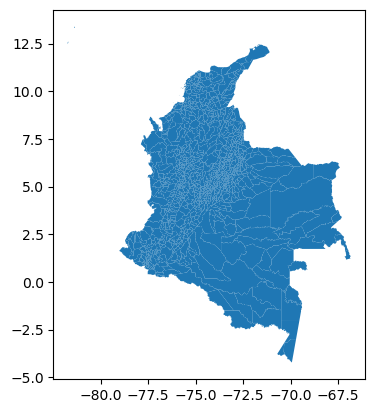

In [4]:

# cargar shapefile
muni = gpd.read_file("MGN_MPIO_POLITICO.shp")
muni.plot()


In [7]:
## ver los datos de shape 
muni.head (5)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,pre07_min,pre07_max,pre07_rang,pre06_mean,pre06_medi,pre06_stde,pre06_min,pre06_max,pre06_rang,geometry
0,05,893,05893,ANTIOQUIA,YONDÓ,Ordenanza 38 de Noviembrebre 23 de 1978,1894.987490,4,2020,MUNICIPIO,...,157.438995,253.035950,95.596954,309.360477,306.067764,21.275585,187.139771,379.082916,191.943146,"POLYGON ((-73.92455 7.26757, -73.92444 7.26587..."
1,05,895,05895,ANTIOQUIA,ZARAGOZA,1770,1167.357617,4,2020,MUNICIPIO,...,243.777893,386.253357,142.475464,283.700804,283.371368,18.428146,253.739868,335.642792,81.902924,"POLYGON ((-74.76103 7.72477, -74.76084 7.72450..."
2,23,001,23001,CÓRDOBA,MONTERÍA,Ordenanza 42 del 27 de Abril de 1923,3136.587044,4,2020,MUNICIPIO,...,133.436661,282.737701,149.301041,175.879532,173.910561,12.221636,153.423523,209.578354,56.154831,"POLYGON ((-76.12448 8.94819, -76.12492 8.94696..."
3,23,068,23068,CÓRDOBA,AYAPEL,Ordenanza 42 del 27 de Abril de 1923,1964.838822,4,2020,MUNICIPIO,...,319.551392,527.333435,207.782043,235.408341,233.603073,13.476501,211.217789,290.025482,78.807693,"POLYGON ((-75.00565 8.52277, -75.00536 8.52271..."
4,23,079,23079,CÓRDOBA,BUENAVISTA,Ordenanza 10 de Diciembre de 1969,834.927038,4,2020,MUNICIPIO,...,308.638123,492.191925,183.553802,214.243492,212.673759,10.008384,200.226913,257.941772,57.714859,"POLYGON ((-75.35428 8.37581, -75.34785 8.35613..."


In [8]:
# quitar departamentos para trabajar solo con Cundinamarca y Bogotá
prue = muni
prue2 = prue[prue.DPTO_CCDGO == 25]
prueB = prue[prue.DPTO_CCDGO == 11]

In [9]:
# concatenar shapefiles
mp = pd.concat([prue2, prueB], ignore_index=True)


In [10]:

# problemas con municipio de ubala
mp = mp[mp.MPIO_CCDGO != 839]

In [14]:
uba = prue2[prue2.MPIO_CCDGO == 839]
if len(uba) > 0:
    uba2 = uba.loc[uba.index[0]]
    mp = pd.concat([mp, uba2], ignore_index=True)

In [15]:
# graficar shapefile
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(figsize=(10, 10))
mp.plot(ax=ax, edgecolor='black', facecolor='none')
prueB.plot(ax=ax, edgecolor='black', facecolor='none')
plt.show()


C:\Users\DELL\anaconda3\envs\data_analisis\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\data_analisis\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

<Figure size 1000x1000 with 1 Axes>

In [ ]:

# graficar con leaflet
import folium

m = folium.Map(location=[mp.centroid.y.mean(), mp.centroid.x.mean()], zoom_start=9)

folium.GeoJson(mp).add_to(m)
folium.GeoJson(prueB).add_to(m)

m